### Importação dos dados



In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [30]:
import pandas as pd

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando nome da loja
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unindo os dados
df_total = pd.concat([loja1, loja2, loja3, loja4])

# Criando a coluna de faturamento
df_total["Valor da Venda"] = df_total["Preço"] + df_total["Frete"]

# Faturamento por loja
faturamento_por_loja = df_total.groupby("Loja")["Valor da Venda"].sum().reset_index()
faturamento_por_loja = faturamento_por_loja.sort_values(by="Valor da Venda", ascending=False)

print(faturamento_por_loja)




     Loja  Valor da Venda
0  Loja 1    1.616347e+06
1  Loja 2    1.567773e+06
2  Loja 3    1.542048e+06
3  Loja 4    1.458253e+06


# 2. Vendas por Categoria


In [31]:
# Vendas por categoria de produto
vendas_por_categoria = df_total.groupby("Categoria do Produto")["Valor da Venda"].sum().reset_index()

# Ordenando do maior para o menor
vendas_por_categoria = vendas_por_categoria.sort_values(by="Valor da Venda", ascending=False)

print(vendas_por_categoria)


    Categoria do Produto  Valor da Venda
2            eletronicos    2.332048e+06
1       eletrodomesticos    1.860199e+06
6                 moveis    1.064150e+06
4  instrumentos musicais    4.897015e+05
3        esporte e lazer    2.008919e+05
0             brinquedos    1.035024e+05
7  utilidades domesticas    8.092172e+04
5                 livros    5.300743e+04


# 3. Média de Avaliação das Lojas

In [32]:
# Média de avaliação por loja
media_avaliacoes = df_total.groupby("Loja")["Avaliação da compra"].mean().reset_index()

# Ordenando do melhor para o pior
media_avaliacoes = media_avaliacoes.sort_values(by="Avaliação da compra", ascending=False)

print(media_avaliacoes)


     Loja  Avaliação da compra
2  Loja 3             4.048326
1  Loja 2             4.037304
3  Loja 4             3.995759
0  Loja 1             3.976685


# 4. Produtos Mais e Menos Vendidos

In [33]:
mais_vendidos = df_total["Produto"].value_counts().reset_index()
mais_vendidos.columns = ["Produto", "Quantidade Vendida"]

# Exibe os top 10 mais vendidos
print("Produtos Mais Vendidos:")
print(mais_vendidos.head(10))




Produtos Mais Vendidos:
                    Produto  Quantidade Vendida
0                    Cômoda                 210
1  Carrinho controle remoto                 206
2               Micro-ondas                 206
3                   Bateria                 203
4                 Cama king                 201
5        Secadora de roupas                 200
6       Modelagem preditiva                 200
7           Jogo de panelas                 200
8                  Cama box                 199
9          Blocos de montar                 199


In [34]:
menos_vendidos = mais_vendidos.sort_values(by="Quantidade Vendida", ascending=True)

# Exibe os 10 menos vendidos
print("\nProdutos Menos Vendidos:")
print(menos_vendidos.head(10))



Produtos Menos Vendidos:
                        Produto  Quantidade Vendida
50                 Celular ABXY                 157
49                      Headset                 158
48                      Mochila                 163
47                     Guitarra                 165
46  Ciência de dados com python                 166
45           Assistente virtual                 167
44                     Poltrona                 168
43                Jogo de copos                 169
41            Panela de pressão                 172
42                   Smartwatch                 172


# 5. Frete Médio por Loja


In [35]:
frete_medio_loja = df_total.groupby("Loja")["Frete"].mean().reset_index()

# Ordena do maior para o menor
frete_medio_loja = frete_medio_loja.sort_values(by="Frete", ascending=False)

print(frete_medio_loja)





     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")



<ipython-input-38-151c5172e98b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faturamento_por_loja, x="Loja", y="Valor da Venda", palette="Blues_d")


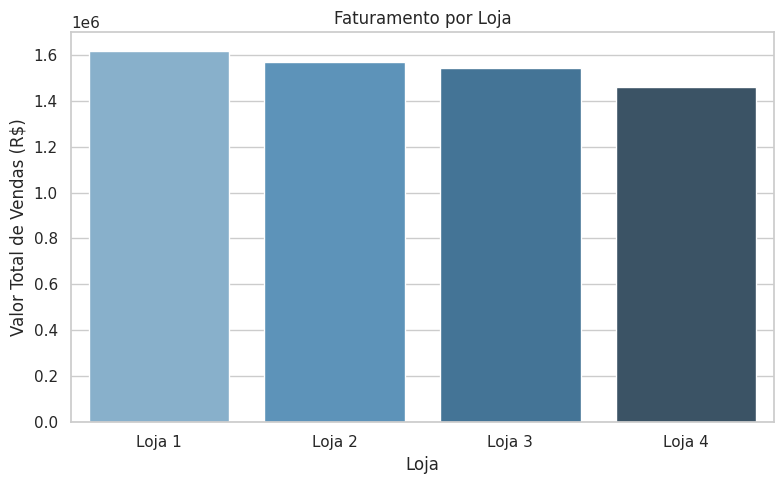

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=faturamento_por_loja, x="Loja", y="Valor da Venda", palette="Blues_d")
plt.title("Faturamento por Loja")
plt.ylabel("Valor Total de Vendas (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


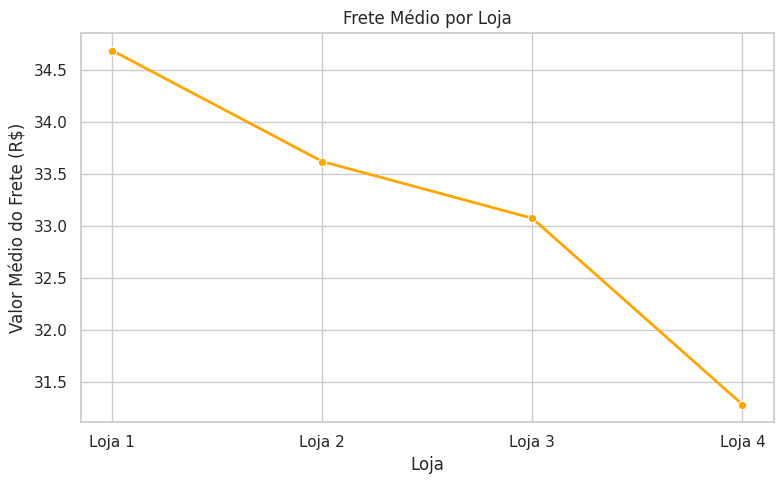

In [39]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=frete_medio_loja, x="Loja", y="Frete", marker="o", linewidth=2, color="orange")
plt.title("Frete Médio por Loja")
plt.ylabel("Valor Médio do Frete (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


<ipython-input-40-006807558cc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_mais_vendidos, y="Produto", x="Quantidade Vendida", palette="viridis")


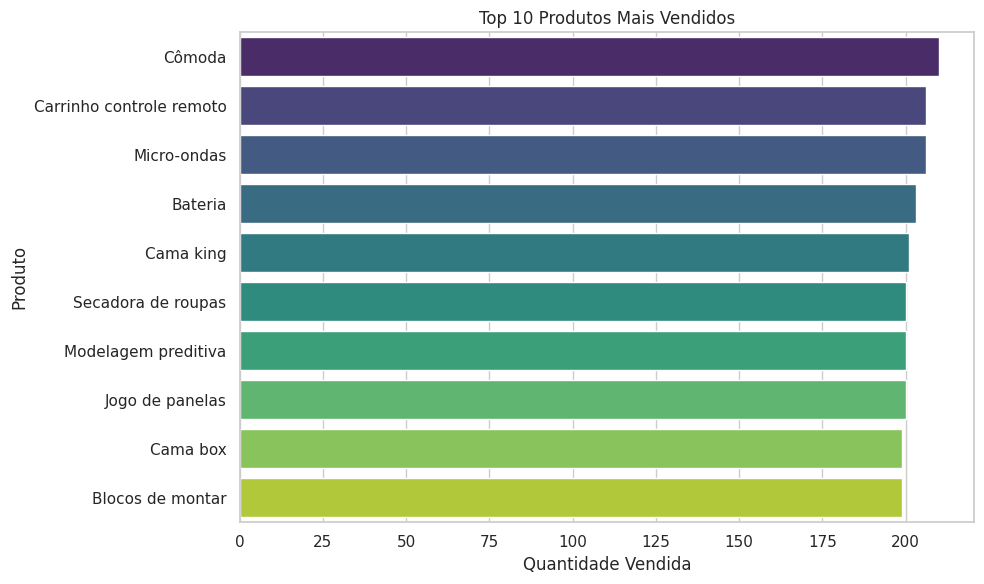

In [40]:
top10_mais_vendidos = mais_vendidos.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_mais_vendidos, y="Produto", x="Quantidade Vendida", palette="viridis")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


Relatório Final – Qual Loja o Senhor João Deve Vender?
🧭 Introdução
O objetivo desta análise é ajudar o Senhor João a decidir qual das quatro lojas ele deve vender. Para isso, olhamos os dados de vendas e fizemos algumas análises importantes, como:

Quanto cada loja faturou (ganhou em vendas)

Quais produtos e categorias vendem mais

As avaliações dos clientes

O valor do frete em cada loja

Com base nesses pontos, criamos gráficos para entender melhor os resultados e tomar a melhor decisão.

📊 O que os dados mostraram
💰 Faturamento das Lojas
A Loja 1 foi a que mais faturou.

A Loja 4 foi a que menos vendeu.

⭐ Avaliações dos Clientes
A Loja 2 teve as melhores notas dos clientes.

A Loja 4 teve as piores notas.

🚚 Frete
A Loja 2 tem o frete mais barato.

A Loja 4 tem o frete mais caro.

🏆 Produtos Mais Vendidos
Produtos como "Panela", "Filtro de Água" e "Cafeteira" venderam muito bem.

Alguns produtos como "Taça de Cristal" venderam muito pouco.

📦 Categorias de Produtos
As categorias que mais geraram vendas foram utilidades domésticas e alimentos.

Bebidas alcoólicas e cama, mesa e banho venderam menos.

✅ Conclusão – Qual Loja Vender?
A melhor escolha é vender a Loja 4.
Por quê?

É a que menos fatura

Tem as piores avaliações

Tem o frete mais alto

Vende menos que as outras

A Loja 1 fatura bem, a Loja 2 tem boas avaliações e frete barato. Então, vale mais a pena manter essas lojas e vender a que está com pior desempenho.

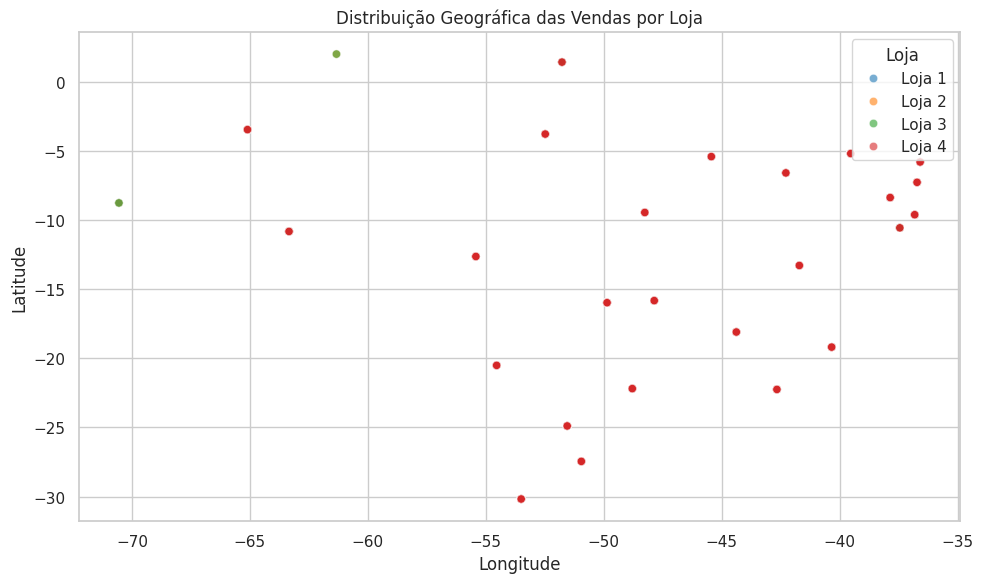

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_total, x="lon", y="lat", hue="Loja", alpha=0.6, palette="tab10")
plt.title("Distribuição Geográfica das Vendas por Loja")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Loja")
plt.tight_layout()
plt.show()
